# preprocessing
- find null values
- replace with feature mean
- find outliers (especially m2)
- enumarate categorical features
- drop title col
- drop id col
- convert all prices to try
- drop lat lon
- convert date values to be of the same race
- drop type (bcz all values are flat)
- drop currency
-

In [59]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("test")

test


In [ ]:
FILENAME = "real_estate_data.csv"
df = pd.read_csv(FILENAME)
df

In [ ]:
df.isnull() 

In [ ]:
missing_values_summary = df.isnull().sum()
print(missing_values_summary)


In [ ]:
# Find rows where 'bath' column has null values
null_bath_rows = df[df['bath'].isnull()]

# Display the DataFrame with null values in the 'bath' column
null_bath_rows

In [ ]:
import numpy as np
# Replace 'None' with np.nan if it's not already done
df.replace('None', np.NaN, inplace=True)

# Remove rows with any null values
df_cleaned = df.dropna()

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('cleaned_data.csv', index=False)

# Display the cleaned DataFrame
print(df_cleaned)



In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('cleaned_data.csv')



In [ ]:
import pandas as pd
df.shape

In [ ]:
df.values

# DROP FETURES

In [ ]:
# Drop the 'Title' feature
df.drop('Title', axis=0, inplace=True)
df

In [ ]:
# Check if 'Title' column exists before dropping
if 'Title' in df.columns:
    # Drop the 'Title' feature
    df.drop('Title', axis=1, inplace=True)

# Display the DataFrame after potentially dropping the 'Title' feature
print(df)

In [ ]:
# Check if 'Title' column exists before dropping
if 'Id' in df.columns:
    # Drop the 'Title' feature
    df.drop('Id', axis=1, inplace=True)
df

In [ ]:
# Check if 'Title' column exists before dropping
if 'lat' in df.columns:
    # Drop the 'Title' feature
    df.drop('lat', axis=1, inplace=True)
df,

# Check if 'Title' column exists before dropping
if 'lon' in df.columns:
    # Drop the 'Title' feature
    df.drop('lon', axis=1, inplace=True)
df

# Check if 'Title' column exists before dropping
if 'type' in df.columns:
    # Drop the 'Title' feature
    df.drop('type', axis=1, inplace=True)
df

In [ ]:
df.loc[df['currency'] == 'Euro', 'price'] *= 4
df.loc[df['currency'] == 'Euro', 'currency'] = 'Turkish Lira'
df.loc[df['currency'] == 'US Dollar', 'price'] *= 3.5
df.loc[df['currency'] == 'Euro', 'currency'] = 'Turkish Lira'
df.loc[df['currency'] == 'British Pound', 'price'] *= 4.5
df.loc[df['currency'] == 'Euro', 'currency'] = 'Turkish Lira'

# Check if 'Title' column exists before dropping
if 'type' in df.columns:
    # Drop the 'Title' feature
    df.drop('type', axis=1, inplace=True)



In [58]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define a condition to identify outliers
outlier_condition = (df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))

# Display rows containing outliers
outliers = df[outlier_condition]
df.size


652860

c:\Users\huday\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


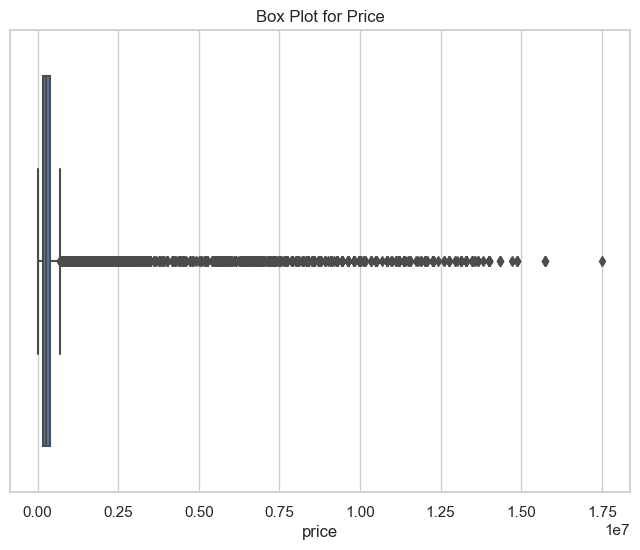

In [60]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Create a box plot for the 'price' column
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', data=df, orient='v')
plt.title('Box Plot for Price')
plt.show()